In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
start_date = '2022-01-01'
end_date = '2023-09-16'
ticker = 'UBS'
df = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


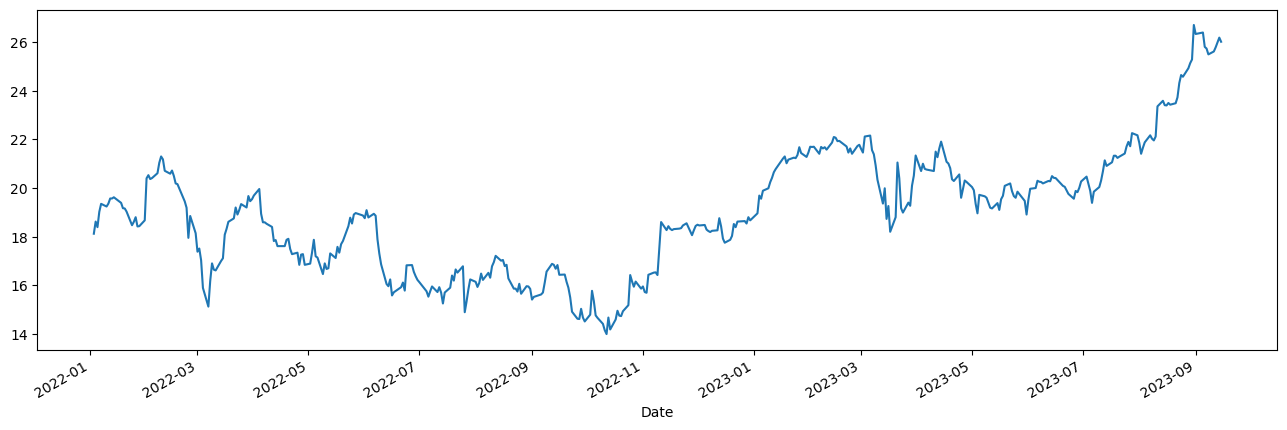

In [220]:
ax = df['Close'].plot(figsize=(16,5))
ax.autoscale(axis='Date',tight=True)

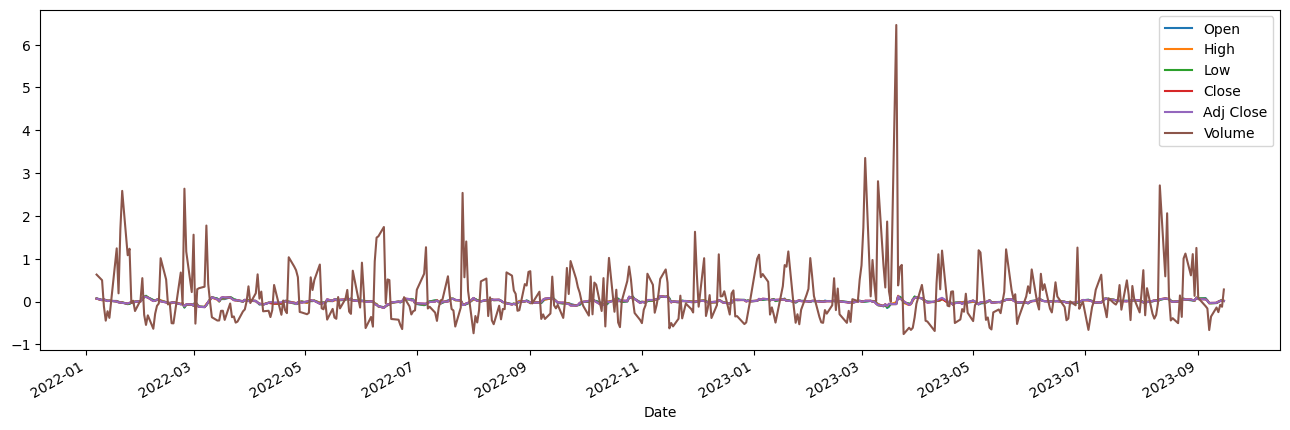

In [210]:
ax = df.pct_change(4).plot(figsize=(16,5))
ax.autoscale(axis='Date',tight=True)

In [221]:
df.pct_change(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,0.073415,0.067437,0.070117,0.067881,0.067881,0.629186
...,...,...,...,...,...,...
2023-09-11,-0.036718,-0.032909,-0.031976,-0.029545,-0.029545,-0.139537
2023-09-12,-0.013097,-0.005747,-0.005254,-0.000775,-0.000775,-0.247789
2023-09-13,0.018345,0.018432,0.014493,0.009713,0.009713,-0.076577


In [239]:
df4 = df.pct_change(4)
df4.dropna(inplace=True)


<AxesSubplot:xlabel='Date'>

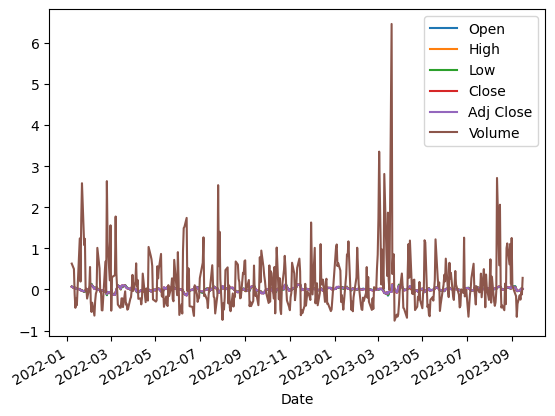

In [223]:
df4.plot()

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns

In [214]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2022-01-07 to 2023-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       296 non-null    float64
 1   High       296 non-null    float64
 2   Low        296 non-null    float64
 3   Close      296 non-null    float64
 4   Adj Close  296 non-null    float64
 5   Volume     296 non-null    float64
dtypes: float64(6)
memory usage: 24.3 KB


In [215]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
Series = pd.DataFrame(df4['Close'])

<AxesSubplot:xlabel='Date'>

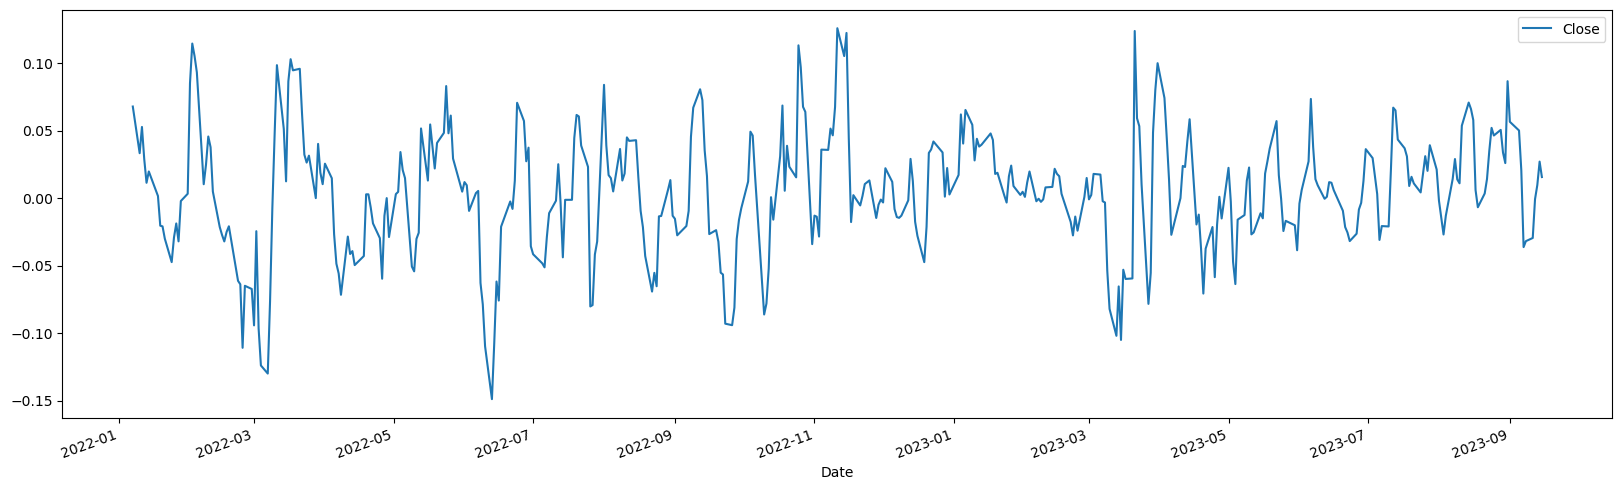

In [225]:
# StockData['TradeDate']=df4.Date
 
# Plotting the stock prices
%matplotlib inline
Series.plot( y='Close', kind='line', figsize=(20,6), rot=20)

In [226]:
RawData=Series[['Close']].values
print(FullData[0:5])
 
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# Choosing between Standardization or normalization
sc = StandardScaler()
#sc=MinMaxScaler()
 
DataScaler = sc.fit(RawData)
X=DataScaler.transform(RawData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[0.06788077]
 [0.03329747]
 [0.05274613]
 [0.02891689]
 [0.01136947]]
### After Normalization ###


array([[1.42477119],
       [0.6510179 ],
       [1.08615459],
       [0.55300845],
       [0.16040936]])

In [230]:
X_samples = list()
y_samples = list()


TimeSteps=12  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=6 # How many days in future you want to predict the prices


# X[:-6] - get back in the time; get rid of the last period 
train = X[:-(FutureTimeSteps)]
# train[-12:] - use the last period of available data (training set)
test_X_for_preds = train[-TimeSteps:]
# X[-6:] - compare with true future values; data unavailable for training set
test_y_actuals = X[-FutureTimeSteps:]
df_test_y_actuals = pd.DataFrame( X[-FutureTimeSteps:], index=Series.index[-FutureTimeSteps:])

# Reshape the Input as a 3D (samples, Back Time Steps, Features); Features is always 1 for time series - 1 variable
test_X_for_preds = test_X_for_preds.reshape(1, TimeSteps, 1)
# Reshape the Output as a 2D (samples, Future Time Steps)
test_y_actuals = test_y_actuals.reshape(test_samples, FutureTimeSteps)

NumerOfRows = len(train)

df_x_samples = pd.DataFrame()
df_y_samples = pd.DataFrame() 

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = train[i-TimeSteps:i]
    y_sample = train[i:i+FutureTimeSteps]
    df_x_samples = pd.concat( [df_x_samples, pd.DataFrame(x_sample, index=Series.index[i-TimeSteps:i])])
    df_y_samples = pd.concat( [df_y_samples, pd.DataFrame(y_sample, index=Series.index[i:i+FutureTimeSteps])])
    X_samples.append(x_sample)
    y_samples.append(y_sample)
    
    
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
y_data=y_data.reshape(y_data.shape[0],y_data.shape[1])

print(y_data.shape)

df_X_train = df_x_samples
df_y_train = df_y_samples
X_train=X_data
y_train=y_data

### Input Data Shape ###
(400, 12, 1)
### Output Data Shape ###
(400, 6)


In [231]:
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[ 1.42477119]
 [ 0.6510179 ]
 [ 1.08615459]
 [ 0.55300845]
 [ 0.16040936]
 [ 0.3479249 ]
 [-0.0592984 ]
 [-0.55127073]
 [-0.5627036 ]
 [-0.76677188]
 [-1.15553089]
 [-0.74755117]]
====>
[-0.51434861 -0.8111459  -0.1424196  -0.02183332  1.81017101  2.46891795]
####################
[[ 0.6510179 ]
 [ 1.08615459]
 [ 0.55300845]
 [ 0.16040936]
 [ 0.3479249 ]
 [-0.0592984 ]
 [-0.55127073]
 [-0.5627036 ]
 [-0.76677188]
 [-1.15553089]
 [-0.74755117]
 [-0.51434861]]
====>
[-0.8111459  -0.1424196  -0.02183332  1.81017101  2.46891795  2.26115098]
####################


In [232]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 12
Number of Features: 1


In [278]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 12, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second hidden layer and the LSTM layer
#regressor.add(LSTM(units = 512, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 512, activation = 'tanh', return_sequences=False ))
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 3, epochs = 5)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/5
134/134 [==============================] - 8s 42ms/step - loss: 1.0112
Epoch 2/5
134/134 [==============================] - 6s 42ms/step - loss: 0.9651
Epoch 3/5
134/134 [==============================] - 6s 42ms/step - loss: 0.9117
Epoch 4/5
134/134 [==============================] - 6s 41ms/step - loss: 0.8750
Epoch 5/5
134/134 [==============================] - 6s 42ms/step - loss: 0.8498
############### Total Time Taken:  1 Minutes #############


In [268]:
test_X_for_preds.shape

(1, 12, 1)

In [279]:

# Making predictions on test data
predicted_Price = regressor.predict(test_X_for_preds)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=test_y_actuals
orig=DataScaler.inverse_transform(orig)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 537ms/step
#### Predicted Prices ####
[[-0.03119645 -0.02481416 -0.01044535 -0.0020939  -0.00581125 -0.00845322]]

#### Original Prices ####
[[-0.03189067 -0.02954541 -0.00077484  0.00971251  0.02705884  0.01561279]]


In [280]:
predicted_Price.flatten()

array([-0.03119645, -0.02481416, -0.01044535, -0.0020939 , -0.00581125,
       -0.00845322], dtype=float32)

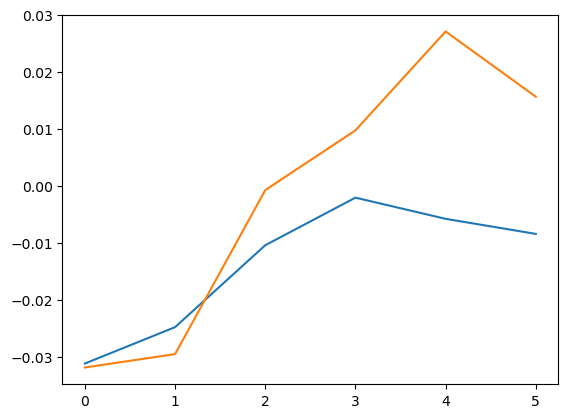

In [281]:

plt.plot(predicted_Price.flatten())
plt.plot(orig.flatten())

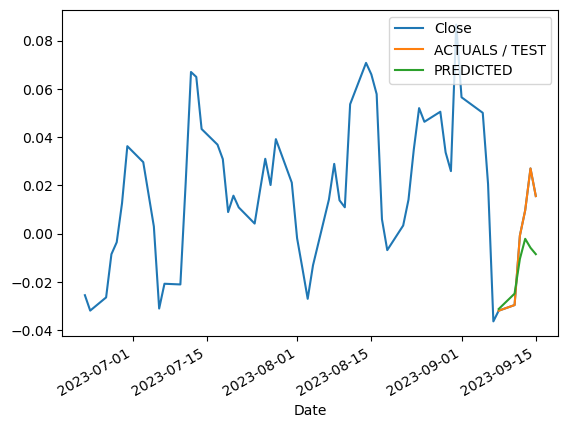

In [282]:
ax = Series[-60:].plot()
orig_df = pd.DataFrame(orig.flatten(),index=Series[-(len(orig.flatten())):].index,columns=['ACTUALS / TEST']).plot(ax=ax)
predicted_Price_df = pd.DataFrame(predicted_Price.flatten(),index=Series[-(len(predicted_Price.flatten())):].index,columns=['PREDICTED']).plot(ax=ax)